In [1]:
import os
os.getcwd()


'C:\\Users\\PC'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
class Info(): 
    def __init__(self,data):
        self.data = pd.read_csv("hmelq.csv")
        data=self.data
        print(data.head())
        print(data.info())
        print(data.describe().T)
        print(data.shape)
        print(data.columns)


In [10]:
data = pd.read_csv("hmelq.csv")

In [11]:
Info(data)

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   obje

In [8]:
# Nan degeri sayısı.
data.isnull().sum()

ind_5        0
ind_6        0
ind_8        0
ind_9        0
ind_10       0
            ..
ind_426      0
ind_428      0
20_target    0
50_target    0
90_target    0
Length: 136, dtype: int64

In [7]:
#Çoğunluk sınıfı kullanarak değiştirme 
data["reason"].fillna(value = "DebtCon",inplace = True)
data["job"].fillna(value = "Other",inplace = True)

data["derog"].fillna(value=0,inplace=True)
data["delinq"].fillna(value=0,inplace=True)

#Her sınıfın ortalamasını kullanarak değiştirme
data.fillna(value=data.mean(),inplace=True)

In [8]:
#eksik olan tüm değerler doldurulur
data.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [9]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327


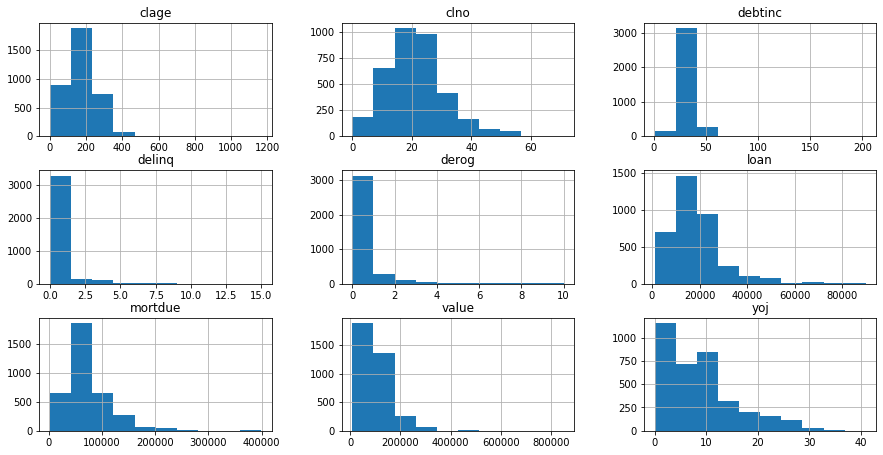

In [31]:
data_hist=data[["loan","clno",'mortdue', "derog","delinq","clage","value", "yoj", "debtinc"]]
data_hist.hist(bins=10,figsize=(15,7.5))
plt.show()

In [16]:
#Borcunu ödeyenler ve ödemeyenlerin dagılımı
y = data.bad
y = y.astype(object) 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
bad,,
0,2863,0.800615
1,713,0.199385


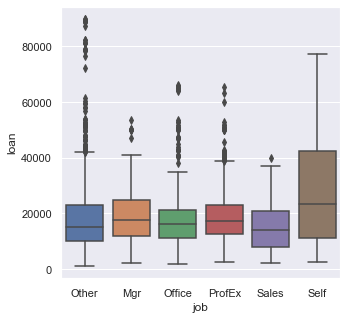

In [23]:
sns.boxplot(x="job" , y = "loan" , data=data)

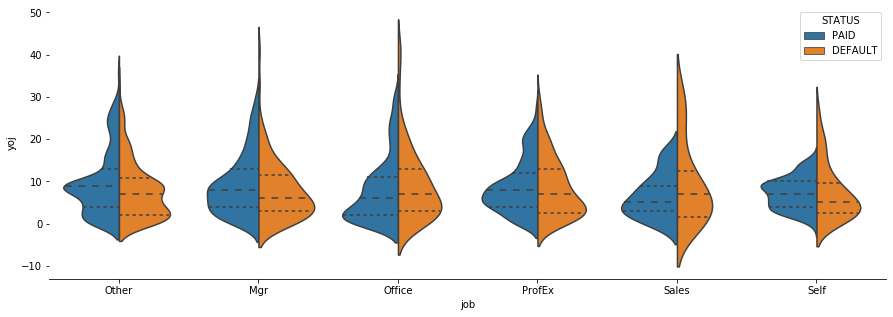

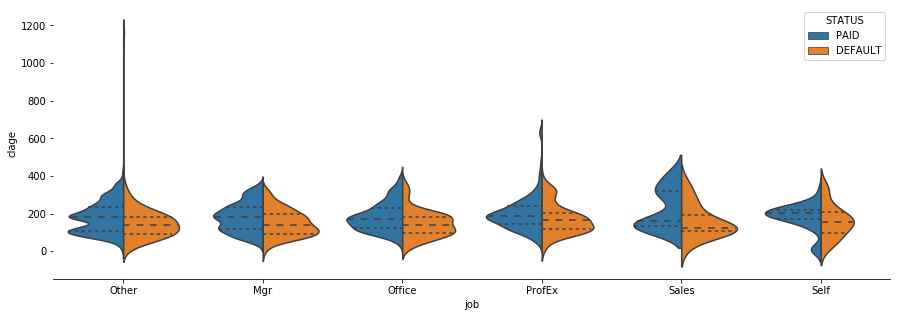

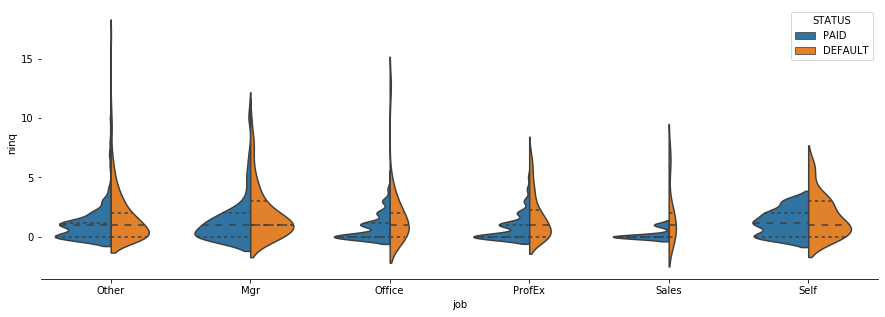

In [21]:
data.loc[data.bad == 1, 'STATUS'] = 'DEFAULT'
data.loc[data.bad == 0, 'STATUS'] = 'PAID'

cols=['yoj', 'clage', 'ninq']

for col in cols:
    
    plt.figure(figsize=(15,5))

    sns.violinplot(x='job', y=col, hue='STATUS',
                   split=True, inner="quart",  palette={'PAID': 'C0', 'DEFAULT':'C1'},
                   data=data)
    
    sns.despine(left=True)

In [17]:
#Kategorik verilerin analiz edilmesi
categorical_cols = [cname for cname in data.columns if
                    data[cname].dtype in ['object']]
cat = data[categorical_cols]
cat.columns

Index(['reason', 'job'], dtype='object')

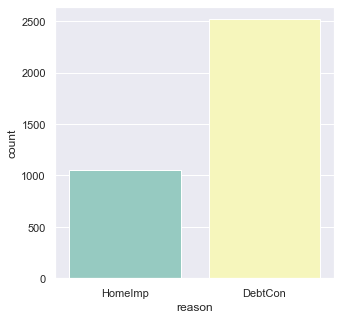

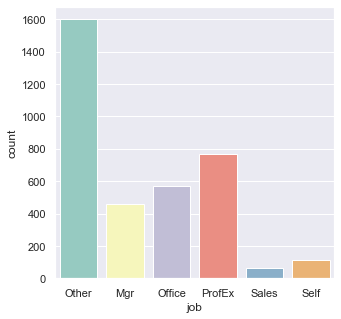

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['reason','job']

for col in fcat:
    plt.figure()
    sns.countplot(x=cat[col], data=cat, palette="Set3")
    plt.show()

In [19]:
# One-hot encode işlemi.
Encod_data = pd.get_dummies(data)
print(Encod_data)

      bad   loan        mortdue          value        yoj  derog  delinq  \
0       0  81200   18834.000000  108355.000000  28.000000    0.0     0.0   
1       0  12600  103960.000000  127384.000000   2.000000    0.0     0.0   
2       0  18000   46865.000000   61266.000000   5.000000    0.0     0.0   
3       0  10300   57676.000000   71027.000000  19.000000    0.0     0.0   
4       0   9400   56508.000000   78358.000000  17.000000    0.0     0.0   
...   ...    ...            ...            ...        ...    ...     ...   
3571    1   8400   31800.000000   72000.000000   8.832644    0.0     2.0   
3572    1  21600  154991.000000  101076.922759   8.832644    2.0     4.0   
3573    1  24000   35000.000000  101076.922759   3.000000    1.0     0.0   
3574    1  10000   74013.907992   25010.000000   5.000000    0.0     3.0   
3575    1   5900   74013.907992   28000.000000   1.000000    2.0     1.0   

       clage  ninq  clno    debtinc  reason_DebtCon  reason_HomeImp  job_Mgr  \
0     1

In [34]:
# Sayısal verilerin görselleştirilmesi
numerical_cols = [cname for cname in data.columns if
                 data[cname].dtype in ['float']]
num = data[numerical_cols]
num.columns

Index(['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno',
       'debtinc'],
      dtype='object')

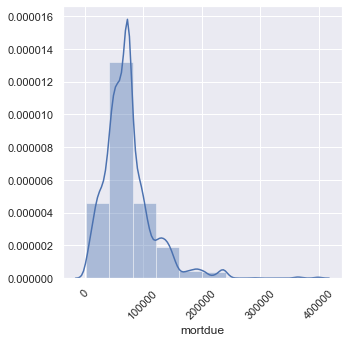

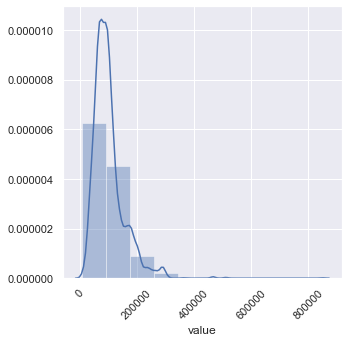

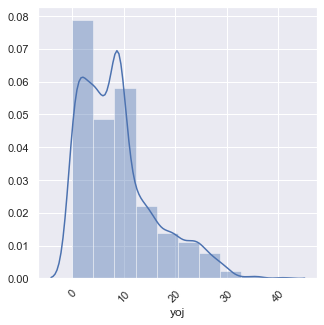

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

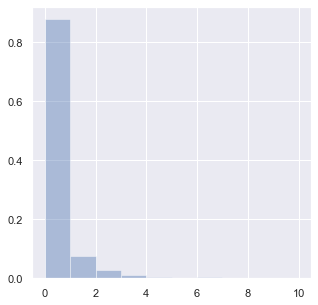

In [35]:
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['mortdue','value','yoj','derog','clage','debtinc','delinq','ninq','clno']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()

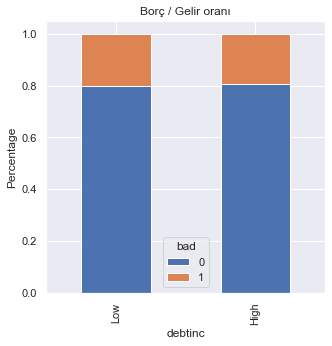

In [38]:
dataWithBin = data.copy()
bins=[0,40,204] 
group=['Low','High'] 
dataWithBin['debtinc_bin']=pd.cut(dataWithBin['debtinc'],bins,labels=group)
LOAN_bin=pd.crosstab(dataWithBin['debtinc_bin'],dataWithBin['bad'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Borç / Gelir oranı')
plt.xlabel('debtinc')
P= plt.ylabel('Percentage')

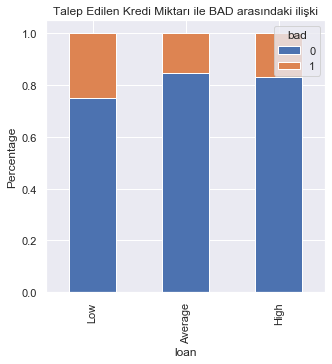

In [39]:
bins=[0,15000,25000,90000] 
group=['Low','Average','High'] 
dataWithBin['loan_bin']=pd.cut(data['loan'],bins,labels=group)
LOAN_bin=pd.crosstab(dataWithBin['loan_bin'],dataWithBin['bad'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Talep Edilen Kredi Miktarı ile BAD arasındaki ilişki')
plt.xlabel('loan')
P= plt.ylabel('Percentage')

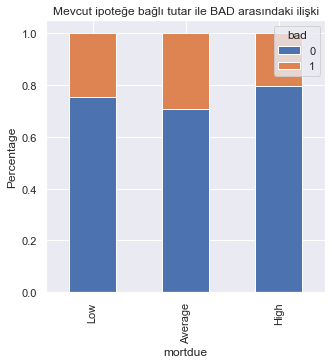

In [41]:
group=['Low','Average','High'] 
dataWithBin['mortdue_bin']=pd.cut(dataWithBin['mortdue'],bins,labels=group)
LOAN_bin=pd.crosstab(dataWithBin['mortdue_bin'],dataWithBin['bad'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Mevcut ipoteğe bağlı tutar ile BAD arasındaki ilişki')
plt.xlabel('mortdue')
P= plt.ylabel('Percentage')

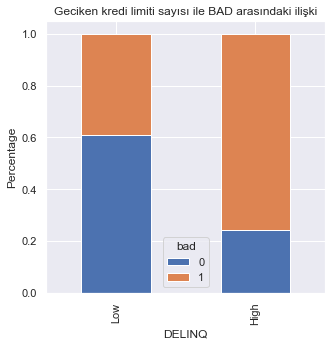

In [42]:
bins=[0,3,15] 
group=['Low','High'] 
dataWithBin['delinq_bin']=pd.cut(dataWithBin['delinq'],bins,labels=group)
LOAN_bin=pd.crosstab(dataWithBin['delinq_bin'],dataWithBin['bad'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Geciken kredi limiti sayısı ile BAD arasındaki ilişki')
plt.xlabel('DELINQ')
P= plt.ylabel('Percentage')

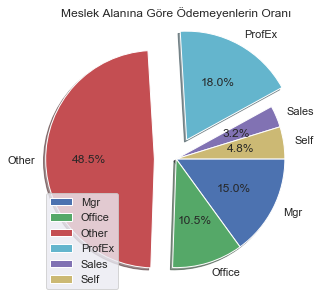

In [52]:
data_prof_inad = pd.crosstab(data['bad'],data['job'])
data_prof_inad = data_prof_inad.T
data_prof_inad = data_prof_inad[1]


plt.pie(data_prof_inad, colors=['b', 'g', 'r', 'c', 'm', 'y'], 
        labels= data_prof_inad.index,explode=(0, 0, 0.2, 0.2, 0, 0),
        autopct='%1.1f%%',
        counterclock=False, shadow=True)

plt.title('Meslek Alanına Göre Ödemeyenlerin Oranı')
plt.legend(data_prof_inad.index,loc=3)
plt.show()

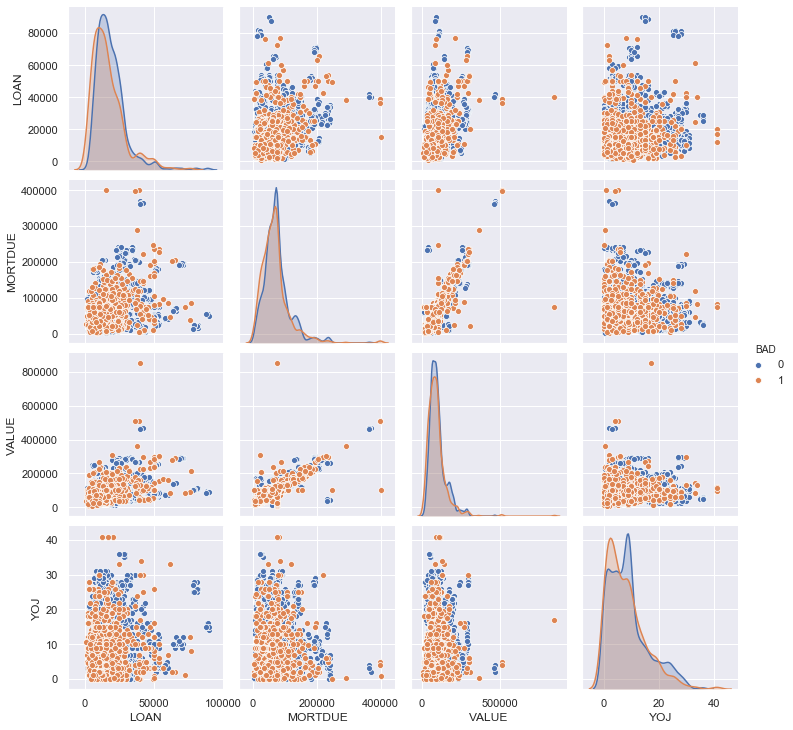

In [45]:
import seaborn as sns
from scipy.stats import norm
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

dic = {"LOAN":data["loan"],"BAD":data["bad"],"MORTDUE":data["mortdue"],"VALUE":data["value"],"YOJ":data["yoj"]}
rcParams['figure.figsize'] = 5, 5

data_pair = pd.DataFrame(dic)
sns.pairplot(data_pair,vars=['LOAN', 'MORTDUE',"VALUE","YOJ"],hue="BAD")

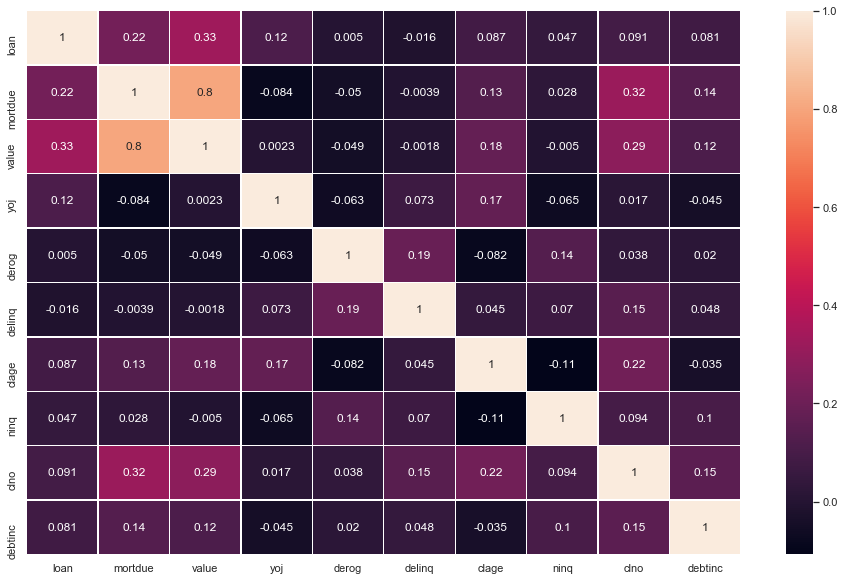

In [51]:
# Korelasyon matrisi ile degişkenler arsaında ki ilişki gözlemlendi.
import matplotlib.pyplot as plt
import seaborn as sns 
corr = ['loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']
data2 = data[corr]
fig, ax = plt.subplots(figsize=(16,10))   
sns.heatmap(data2.corr(), annot=True, linewidths=.3, ax=ax)

In [56]:
import scipy.stats as stats 
from scipy.stats import shapiro
from scipy.stats import f_oneway
import statsmodels.api as sm

In [59]:
for col in data.columns[1:]:           #bad hariç
    if data[col].dtypes != object:
        
        stat, p = shapiro(data[col])

        print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p > alpha:
            print(col)
            print('\033[1m'+ col + '\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject) \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)\n')

Shapiro Statistics=0.849, p=0.000
loan: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.874, p=0.000
mortdue: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.847, p=0.000
value: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.907, p=0.000
yoj: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.312, p=0.000
derog: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.424, p=0.000
delinq: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.920, p=0.000
clage: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.695, p=0.000
ninq: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.964, p=0.000
clno: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.757, p=0.000
debtinc: Örnek

In [60]:
stats.ttest_1samp(data['loan'] , popmean= 18500)

Ttest_1sampResult(statistic=0.15768053185764794, pvalue=0.8747174468842903)